In [1]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import XGBRegressor 
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from matplotlib.pylab import rcParams

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

# Define the data types for each column
data_types = {
    'nameFull':'str',
    'bookingNumber':'str',
    'caseNumber':'str',
    'inmateNumber':'str',
    'housing1':'str',
    'housing1a':'str',
    'housing2':'str',
    'housing3': 'str',
    'nameLast':'str',
    'nameFirst':'str',
    'nameMiddle':'str',
    'age': 'float',
    'sex': 'category',
    'race': 'category',
    'eyeColor': 'category',
    'hairColor': 'category',
    'height': 'float',
    'weight': 'float',
    'bond': 'float',
    'bail': 'float',
    'topcharge': 'category',
    'county':'category'
    #'Top Poliytical': 'category'
}

# Specify which columns should be parsed as datetime
date_columns = ['date', 'bookingDate', 'dob', 'firstappearance']
df = pd.read_csv('CA.csv',dtype= data_types, parse_dates = date_columns)
df.dropna(subset=['nameFull'], inplace=True)
display(df)

,nameFull,bookingNumber,bookingDate,caseNumber,inmateNumber,housing1,housing1a,housing2,housing3,nameLast,...,hairColor,height,weight,bond,bail,topcharge,firstappearance,county,date,incarcerated_days
0,WILDER AMAYA,fn1002001,2010-02-27,NaN,NaN,Monterey County Jail,NaN,NaN,NaN,NaN,...,9,70.0,183.5,NaN,NaN,2,2020-07-08,Monterey,2020-09-17,71
1,SEAN ADAMS,fn1310380,2020-10-16,NaN,NaN,Monterey County Jail,NaN,NaN,NaN,NaN,...,9,70.0,183.5,NaN,NaN,2,2020-10-17,Monterey,2020-11-20,34
2,ECCLESIASTES PRESLEY,fn1410768,2018-01-17,NaN,NaN,Monterey County Jail,NaN,NaN,NaN,NaN,...,9,70.0,183.5,NaN,NaN,2,2020-11-10,Monterey,2020-11-20,10
3,ECCLESIASTES PRESLEY,fn1410768,2018-01-17,NaN,NaN,Monterey County Jail,NaN,NaN,NaN,NaN,...,9,70.0,183.5,NaN,NaN,2,2021-02-23,Monterey,2021-03-18,23
4,KELLY SHAWN GRIMM,fn1505447,2015-06-11,NaN,NaN,Monterey County Jail,NaN,NaN,NaN,NaN,...,9,70.0,183.5,NaN,NaN,2,2021-09-28,Monterey,2021-11-09,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601261,YOLANDA NMN 1461638 OCHOA,NaN,2019-09-04,NaN,NaN,Stanislaus County Jail; Stanislaus County Publ...,NaN,NaN,NaN,NaN,...,9,70.0,183.5,NaN,NaN,1,2020-04-23,Stanislaus,2020-04-30,7
601262,ZACKERY KHRISTOFER 1493242 WORSHAMELLIOTT,NaN,2021-06-23,NaN,NaN,Stanislaus County Jail; Stanislaus County Publ...,NaN,NaN,NaN,NaN,...,9,70.0,183.5,NaN,NaN,1,2021-06-24,Stanislaus,2021-06-24,0
601263,ZACKERY KHRISTOFER 1503856 WORSHAMELLIOTT,NaN,2022-02-18,NaN,NaN,Stanislaus County Jail; Stanislaus County Publ...,NaN,NaN,NaN,NaN,...,9,70.0,183.5,NaN,NaN,1,2022-02-19,Stanislaus,2022-04-05,45
601264,ZAKKERY NMN 1499111 VANCE,NaN,2021-10-28,NaN,NaN,Stanislaus County Jail; Stanislaus County Publ...,NaN,NaN,NaN,NaN,...,9,70.0,183.5,NaN,NaN,1,2021-10-29,Stanislaus,2021-11-03,5


In [3]:
print(df.dtypes)

nameFull                     object
bookingNumber                object
bookingDate          datetime64[ns]
caseNumber                   object
inmateNumber                 object
housing1                     object
housing1a                    object
housing2                     object
housing3                     object
nameLast                     object
nameFirst                    object
nameMiddle                   object
age                         float64
dob                  datetime64[ns]
sex                        category
race                       category
eyeColor                   category
hairColor                  category
height                      float64
weight                      float64
bond                        float64
bail                        float64
topcharge                  category
firstappearance      datetime64[ns]
county                     category
date                 datetime64[ns]
incarcerated_days             int64
dtype: object


In [3]:
import pandas as pd

# Sort the dataset by 'nameFull' and 'firstappearance'
df = df.sort_values(['nameFull', 'firstappearance'])

# Calculate the difference between 'date' and the next 'firstappearance' for each individual
df['time_gap'] = df.groupby('nameFull')['firstappearance'].shift(-1) - df['date']

# Convert the 'time_gap' column to string
df['time_gap'] = df['time_gap'].astype(str)
df['time_gap'] = df['time_gap'].str.replace(' days', '', regex=False)

# Replace "NaT" with 0 in the 'time_gap' column
df['time_gap'] = df['time_gap'].replace('NaT', 0)

# Convert the 'time_gap' column to integers
df['time_gap'] = df['time_gap'].astype(int)

incarceration_count = {}

for index, row in df.iterrows():
    name = str(row['nameFull']).strip() if not pd.isna(row['nameFull']) else None
    if name:
        if name in incarceration_count:
            incarceration_count[name] += 1
        else:
            incarceration_count[name] = 1

# Create a new column 'incarcerated_counts' based on the counts
df['incarcerated_counts'] = df['nameFull'].apply(lambda x: incarceration_count.get(str(x).strip(), 0) 
                                                 if not pd.isna(x) else 0)

# Add a new column reincarcerated base on reincarcerated_counts
df['reincarceration'] = df['incarcerated_counts'].apply(lambda x: 1 if x > 1 else 0)

In [4]:
import pandas as pd

# Assuming you have your data in a DataFrame called df
# You can first group the data by 'nameFull' and count unique 'county' values for each group
reincarcerations_count = df.groupby('nameFull')['county'].nunique().reset_index()

# Create a new column 'reincarcerations_different_county' based on the count
reincarcerations_count['reincarcerations_different_county'] = (reincarcerations_count['county'] > 1).astype(int)

# Merge the result back into the original DataFrame based on 'nameFull'
df = df.merge(reincarcerations_count[['nameFull', 'reincarcerations_different_county']], on='nameFull', how='left')

# If a 'nameFull' value is repeated in different counties, the corresponding
# 'reincarcerations_different_county' value will be 1; otherwise, it will be 0.
display(df)

,nameFull,bookingNumber,bookingDate,caseNumber,inmateNumber,housing1,housing1a,housing2,housing3,nameLast,...,bail,topcharge,firstappearance,county,date,incarcerated_days,time_gap,incarcerated_counts,reincarceration,reincarcerations_different_county
0,(J) BENJAMIN HAYES,NaN,2022-09-24,NaN,202201668,Napa Co. Jail,NaN,NaN,NaN,NaN,...,NaN,9,2022-09-25,Napa,2022-09-27,2,0,1,0,0
1,A ALEXANDER BARRY,6099253,NaT,NaN,NaN,Unknown,NaN,NaN,NaN,barry,...,NaN,9,2021-12-01,Los Angeles,2021-12-11,10,0,1,0,0
2,A D WEBB,so2294642,NaT,NaN,NaN,Kern County Central Receiving Facility; Kern C...,NaN,NaN,NaN,webb,...,NaN,1,2021-04-28,Kern,2021-04-28,0,450,2,1,0
3,A D WEBB,so2322685,NaT,NaN,NaN,Kern County Central Receiving Facility; Kern C...,NaN,NaN,NaN,webb,...,NaN,1,2022-07-22,Kern,2022-07-22,0,0,2,1,0
4,A D WEBB JR,so2334382,NaT,NaN,NaN,Kern County Central Receiving Facility; Kern C...,NaN,NaN,NaN,webb,...,NaN,2,2023-01-20,Kern,2023-03-16,55,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601256,ZYRC DAVIS JR,202123900,2021-06-17,210016757,NaN,robert presley detention cente,NaN,NaN,23c8,NaN,...,NaN,2,2021-06-18,Riverside,2021-06-18,0,0,1,0,0
601257,ZYRON NEWHOUSE,6285273,NaT,NaN,40113763,Unknown,NaN,NaN,NaN,newhouse,...,NaN,9,2021-12-03,Los Angeles,2021-12-03,0,0,1,0,0
601258,ZYSEAN RAY WAFER,22-003686,2022-08-16,NaN,41599,Kings Co. Jail; Kings County Branch Jail,NaN,NaN,NaN,NaN,...,NaN,2,2022-08-17,Kings,2022-08-19,2,17,2,1,0
601259,ZYSEAN RAY WAFER,22-004084,NaT,NaN,41599,Kings Co. Jail; Kings County Branch Jail,NaN,NaN,NaN,wafer,...,NaN,9,2022-09-05,Kings,2023-10-09,399,0,2,1,0


In [6]:
features = ['age', 'sex', 'race',
       'eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
       'topcharge', 'firstappearance', 'county', 'date' ]

not_selected = ['nameFull', 'bookingNumber', 'bookingDate', 'caseNumber',
       'inmateNumber', 'housing1', 'housing1a', 'housing2', 'housing3',
       'nameLast', 'nameFirst', 'nameMiddle', 'dob' , 'incarcerated_days', 
                'reincarceration', 'time_gap', 'reincarcerated_counts']

# Convert date-related columns to datetime
date_columns = ['firstappearance', 'date']
for col in date_columns:
    df.loc[:,col] = pd.to_datetime(df[col], errors='coerce')

#replace nan value in bond and bail with 0
df.loc[:,'bond'].fillna(0, inplace = True)
df.loc[:,'age'].fillna(df['age'].mean(), inplace = True)
df.loc[:,'bail'].fillna(0, inplace = True)

# Convert 'firstappearance' to the year as an integer
df.loc[:,'firstappearance'] = df['firstappearance'].dt.year
df.loc[:,'firstappearance'] = df['firstappearance'].astype(int)
df.loc[:,'date'] = df['date'].dt.year
df.loc[:,'date'] = df['date'].astype(int)


# Convert 'sex' and 'topcharge' to categorical columns
df['sex'] = df['sex'].astype('category')
df['eyeColor'] = df['eyeColor'].astype('category')
df['hairColor'] = df['hairColor'].astype('category')
df['race'] = df['race'].astype('category')
df['county'] = df['county'].astype('category')
#df = pd.get_dummies(df, columns=['county'], drop_first=True)
df['topcharge'] = df['topcharge'].astype('category')
#df = pd.get_dummies(df, columns=['Top Political'], drop_first=True)

## Prediction model for Incarcerated days

[0]	train-rmse:96.45499+0.07720	test-rmse:96.45819+0.30025
[50]	train-rmse:54.32302+0.11400	test-rmse:54.54878+0.36034
[100]	train-rmse:53.66627+0.08240	test-rmse:53.99527+0.39103
[150]	train-rmse:53.38958+0.09058	test-rmse:53.82707+0.38971
[200]	train-rmse:53.20951+0.09390	test-rmse:53.75392+0.38529
[250]	train-rmse:53.05970+0.09367	test-rmse:53.70097+0.38804
[300]	train-rmse:52.91771+0.09287	test-rmse:53.65453+0.38926
[350]	train-rmse:52.79897+0.09063	test-rmse:53.63063+0.39109
[400]	train-rmse:52.68460+0.09502	test-rmse:53.59941+0.38546
[450]	train-rmse:52.57357+0.10086	test-rmse:53.57146+0.38488
[500]	train-rmse:52.47425+0.10016	test-rmse:53.55330+0.38520
[550]	train-rmse:52.38188+0.10004	test-rmse:53.54108+0.38562
[600]	train-rmse:52.29655+0.10014	test-rmse:53.53349+0.38589
[650]	train-rmse:52.21055+0.10055	test-rmse:53.52334+0.38248
[700]	train-rmse:52.13649+0.09972	test-rmse:53.51926+0.38026
[750]	train-rmse:52.06158+0.09845	test-rmse:53.51419+0.37982
[800]	train-rmse:51.98885+0

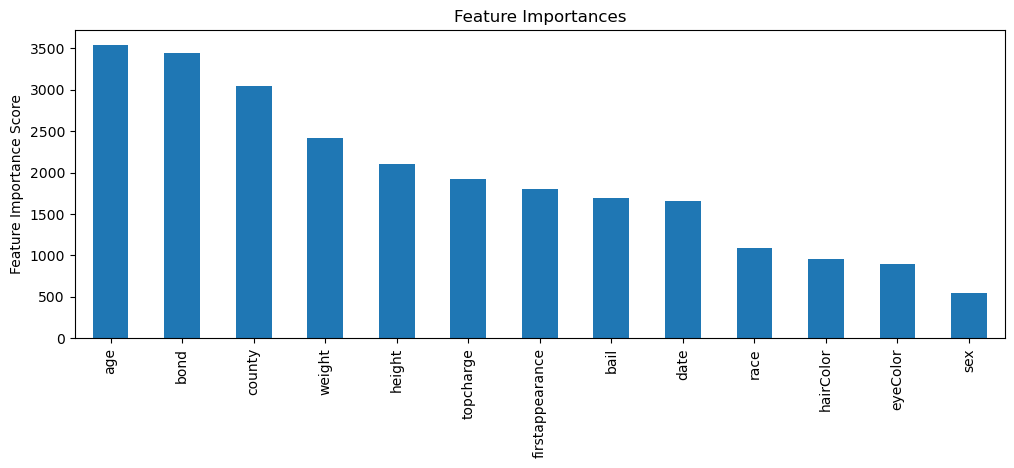

In [4]:
#Choose all predictors except target & IDcols
#predictors = df[features]
rcParams['figure.figsize'] = 12, 4

def modelfit(alg, dtrain, predictors, dtest ,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        #xgtrain = xgb.DMatrix(dtrain[predictors].values, 
                              #label=dtrain['reincarceration'].values, 
                              #enable_categorical = True)
        cvresult = xgb.cv(xgb_param, dtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], 
                          nfold=cv_folds,
                          metrics='rmse', 
                          early_stopping_rounds=early_stopping_rounds,
                         verbose_eval = 50)

        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain.get_data(), dtrain.get_label())
    
    dtrain_predictions = alg.predict(dtrain.get_data())
    dtest_predictions = alg.predict(dtest.get_data())

    # Calculate RMSE for training and test sets
    train_rmse = np.sqrt(mean_squared_error(dtrain.get_label(), dtrain_predictions))
    test_rmse = np.sqrt(mean_squared_error(dtest.get_label(), dtest_predictions))
        
    # Print model report with RMSE
    print("\nModel Report")
    print(f"Training RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")
                    
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feature_mapping = {f"f{idx}": name for idx, name in enumerate(X)}

    # Print feature importance scores
    print("Feature Importance Scores:")
    for feature, score in feat_imp.items():
        original_feature_name = feature_mapping.get(feature, "Unknown")
        print(f"{original_feature_name if original_feature_name != 'Unknown' else feature}: {score}")
        
    # Sort feature importances in descending order
    feat_imp = feat_imp.sort_values(ascending=False)

    # Get the feature names based on their index using the feature_mapping dictionary
    feature_names = [feature_mapping.get(feature, f"f{feature}") for feature in feat_imp.index]

    # Plot the feature importances with feature names
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.xticks(range(len(feature_names)), feature_names, rotation=90)  # Set x-axis labels
    plt.ylabel('Feature Importance Score')
    
    
predictors = [x for x in df.columns if x not in not_selected] 
X = df[predictors]
y = df['incarcerated_days']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a DMatrix with enable_categorical=True
dtrain = xgb.DMatrix(X_train, label = y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label = y_test, enable_categorical=True)

xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 enable_categorical = True)

modelfit(xgb1, dtrain, predictors, dtest = dtest)

## Tunning

In [5]:
from sklearn.metrics import make_scorer


# Define a custom RMSE scoring function
def custom_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Create a scorer using the custom RMSE function
rmse_scorer = make_scorer(custom_rmse, greater_is_better=False)


param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, 
                                                  n_estimators=895, 
                                                  max_depth=5,
                                                  min_child_weight=1, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'reg:squarederror', 
                                                  nthread=4, 
                                                  scale_pos_weight=1, 
                                                  seed=27,
                                                 enable_categorical = True), 
                        param_grid = param_test1, scoring=rmse_scorer,n_jobs=4, cv=5)


gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=0,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bin...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=895,
                                    n_jobs=None, nthread=4,
                                    num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring=make_scorer(custom_rmse, greater_is_better=False))

In [6]:
gsearch1.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_child_weight', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [7]:
 for i in ['mean_test_score', 'params']:
        display(i," : ",gsearch1.cv_results_[i])

'mean_test_score'

' : '

array([-54.45393299, -54.47707313, -54.48249635, -53.49473045,
       -53.48832248, -53.48705786, -53.68161954, -53.6814141 ,
       -53.65805079, -54.61547597, -54.56342988, -54.49040535])

'params'

' : '

[{'max_depth': 3, 'min_child_weight': 1},
 {'max_depth': 3, 'min_child_weight': 3},
 {'max_depth': 3, 'min_child_weight': 5},
 {'max_depth': 5, 'min_child_weight': 1},
 {'max_depth': 5, 'min_child_weight': 3},
 {'max_depth': 5, 'min_child_weight': 5},
 {'max_depth': 7, 'min_child_weight': 1},
 {'max_depth': 7, 'min_child_weight': 3},
 {'max_depth': 7, 'min_child_weight': 5},
 {'max_depth': 9, 'min_child_weight': 1},
 {'max_depth': 9, 'min_child_weight': 3},
 {'max_depth': 9, 'min_child_weight': 5}]

In [11]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, 
                                                  n_estimators=895, 
                                                  max_depth=5,
                                                  min_child_weight=5, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'reg:squarederror', 
                                                  nthread=4, 
                                                  scale_pos_weight=1, 
                                                  seed=27,
                                                 enable_categorical = True), 
                        param_grid = param_test1, scoring=rmse_scorer,n_jobs=4, cv=5)


gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=0,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bin...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=5, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=895,
                                    n_jobs=None, nthread=4,
                                    num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring=make_scorer(custom_rmse, greater_is_better=False))

In [12]:
 for i in ['mean_test_score', 'params']:
        display(i," : ",gsearch2.cv_results_[i])

'mean_test_score'

' : '

array([-54.45393299, -54.47707313, -54.48249635, -53.49473045,
       -53.48832248, -53.48705786, -53.68161954, -53.6814141 ,
       -53.65805079, -54.61547597, -54.56342988, -54.49040535])

'params'

' : '

[{'max_depth': 3, 'min_child_weight': 1},
 {'max_depth': 3, 'min_child_weight': 3},
 {'max_depth': 3, 'min_child_weight': 5},
 {'max_depth': 5, 'min_child_weight': 1},
 {'max_depth': 5, 'min_child_weight': 3},
 {'max_depth': 5, 'min_child_weight': 5},
 {'max_depth': 7, 'min_child_weight': 1},
 {'max_depth': 7, 'min_child_weight': 3},
 {'max_depth': 7, 'min_child_weight': 5},
 {'max_depth': 9, 'min_child_weight': 1},
 {'max_depth': 9, 'min_child_weight': 3},
 {'max_depth': 9, 'min_child_weight': 5}]

In [13]:
param_test2b = { 'min_child_weight':[5, 7, 9, 10]}

gsearch2b = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, 
                                                  n_estimators=895, 
                                                  max_depth=5,
                                                  min_child_weight=5, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'reg:squarederror', 
                                                  nthread=4, 
                                                  scale_pos_weight=1, 
                                                  seed=27,
                                                 enable_categorical = True), 
                        param_grid = param_test1, scoring=rmse_scorer,n_jobs=4, cv=5)


gsearch2b.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=0,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bin...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=5, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=895,
                                    n_jobs=None, nthread=4,
                                    num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring=make_scorer(custom_rmse, greater_is_better=False))

In [14]:
 for i in ['mean_test_score', 'params']:
        display(i," : ",gsearch2b.cv_results_[i])

'mean_test_score'

' : '

array([-54.45393299, -54.47707313, -54.48249635, -53.49473045,
       -53.48832248, -53.48705786, -53.68161954, -53.6814141 ,
       -53.65805079, -54.61547597, -54.56342988, -54.49040535])

'params'

' : '

[{'max_depth': 3, 'min_child_weight': 1},
 {'max_depth': 3, 'min_child_weight': 3},
 {'max_depth': 3, 'min_child_weight': 5},
 {'max_depth': 5, 'min_child_weight': 1},
 {'max_depth': 5, 'min_child_weight': 3},
 {'max_depth': 5, 'min_child_weight': 5},
 {'max_depth': 7, 'min_child_weight': 1},
 {'max_depth': 7, 'min_child_weight': 3},
 {'max_depth': 7, 'min_child_weight': 5},
 {'max_depth': 9, 'min_child_weight': 1},
 {'max_depth': 9, 'min_child_weight': 3},
 {'max_depth': 9, 'min_child_weight': 5}]

In [18]:
param_test3 = { 'gamma':[i/10.0 for i in range(0,5)]}

gsearch3 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, 
                                                  n_estimators=895, 
                                                  max_depth=5,
                                                  min_child_weight=5, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'reg:squarederror', 
                                                  nthread=4, 
                                                  scale_pos_weight=1,
                                                  seed=27, 
                                                 enable_categorical = True), 
                        param_grid = param_test3, scoring=rmse_scorer ,n_jobs=4, cv=5)

gsearch3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=True, eval_metric=None,
                                    feature_types=None, gamma=0,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=5, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=895,
                                    n_jobs=None, nthread=4,
                                    num_parallel_tree=None, ...),
             n_jobs=4, param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             scoring=make_scorer(custom_rmse, greater_is_better=False))

In [19]:
 for i in ['mean_test_score', 'params']:
        display(i," : ",gsearch3.cv_results_[i])

'mean_test_score'

' : '

array([-53.48705786, -53.48705786, -53.48705786, -53.48705786,
       -53.48705786])

'params'

' : '

[{'gamma': 0.0},
 {'gamma': 0.1},
 {'gamma': 0.2},
 {'gamma': 0.3},
 {'gamma': 0.4}]

[0]	train-rmse:96.45660+0.07719	test-rmse:96.45955+0.30014
[50]	train-rmse:54.34159+0.10566	test-rmse:54.54473+0.35272
[100]	train-rmse:53.68697+0.09434	test-rmse:54.00013+0.37399
[150]	train-rmse:53.42265+0.10399	test-rmse:53.84183+0.36845
[200]	train-rmse:53.25613+0.09940	test-rmse:53.77388+0.37640
[250]	train-rmse:53.10093+0.09345	test-rmse:53.71939+0.38215
[300]	train-rmse:52.96356+0.08922	test-rmse:53.66989+0.38816
[350]	train-rmse:52.84900+0.09039	test-rmse:53.64192+0.38388
[400]	train-rmse:52.72730+0.09696	test-rmse:53.60296+0.37654
[450]	train-rmse:52.62269+0.09974	test-rmse:53.58008+0.37562
[500]	train-rmse:52.53368+0.10294	test-rmse:53.56440+0.36916
[550]	train-rmse:52.44659+0.10633	test-rmse:53.55314+0.36889
[600]	train-rmse:52.35806+0.10813	test-rmse:53.53713+0.36682
[650]	train-rmse:52.28074+0.10945	test-rmse:53.53267+0.36474
[700]	train-rmse:52.20679+0.10553	test-rmse:53.52548+0.36793
[750]	train-rmse:52.13731+0.10676	test-rmse:53.52128+0.36903
[800]	train-rmse:52.07019+0

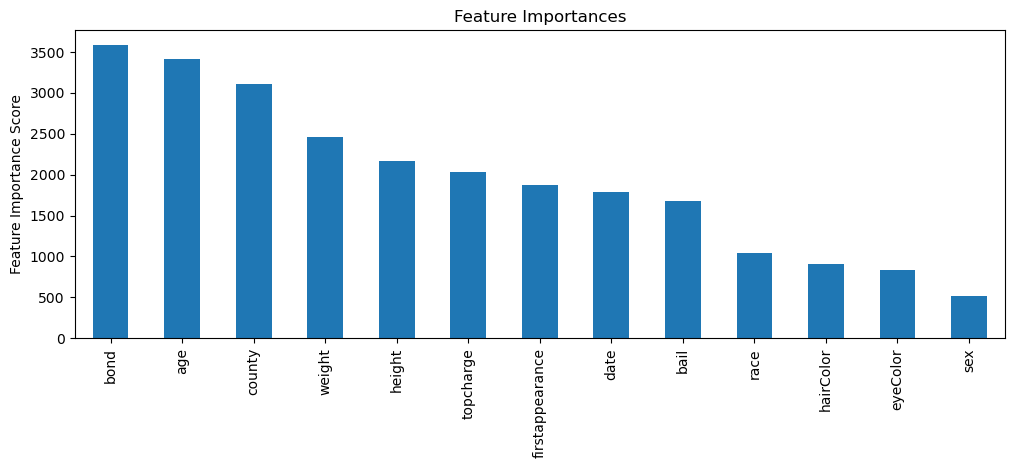

In [21]:
predictors = [x for x in df.columns if x not in not_selected] 
X = df[predictors]
y = df['incarcerated_days']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a DMatrix with enable_categorical=True
dtrain = xgb.DMatrix(X_train, label = y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label = y_test, enable_categorical=True)

xgb2 = XGBRegressor(learning_rate =0.1,
                    n_estimators=895,
                    max_depth=5,
                    min_child_weight=5,
                    gamma=0.3,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'reg:squarederror',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27,
                    enable_categorical = True)

modelfit(xgb2, dtrain, predictors, dtest = dtest)

## Prediction Model for number of incarceration spells

In [3]:
import pandas as pd

# Sort the dataset by 'nameFull' and 'firstappearance'
df = df.sort_values(['nameFull', 'firstappearance'])

# Calculate the difference between 'date' and the next 'firstappearance' for each individual
df['time_gap'] = df.groupby('nameFull')['firstappearance'].shift(-1) - df['date']

incarceration_count = {}

for index, row in df.iterrows():
    name = str(row['nameFull']).strip() if not pd.isna(row['nameFull']) else None
    if name:
        if name in incarceration_count:
            incarceration_count[name] += 1
        else:
            incarceration_count[name] = 1

# Create a new column 'incarcerated_counts' based on the counts
df['incarcerated_counts'] = df['nameFull'].apply(lambda x: incarceration_count.get(str(x).strip(), 0) 
                                                 if not pd.isna(x) else 0)


# Add a new column reincarcerated base on reincarcerated_counts
df['reincarceration'] = df['incarcerated_counts'].apply(lambda x: 1 if x > 1 else 0)

display(df)

,nameFull,bookingNumber,bookingDate,caseNumber,inmateNumber,housing1,housing1a,housing2,housing3,nameLast,...,bond,bail,topcharge,firstappearance,county,date,incarcerated_days,time_gap,incarcerated_counts,reincarceration
428320,(J) BENJAMIN HAYES,NaN,2022-09-24,NaN,202201668,Napa Co. Jail,NaN,NaN,NaN,NaN,...,100000.0,NaN,9,2022-09-25,Napa,2022-09-27,2,NaT,1,0
282037,A ALEXANDER BARRY,6099253,NaT,NaN,NaN,Unknown,NaN,NaN,NaN,barry,...,NaN,NaN,9,2021-12-01,Los Angeles,2021-12-11,10,NaT,1,0
206843,A D WEBB,so2294642,NaT,NaN,NaN,Kern County Central Receiving Facility; Kern C...,NaN,NaN,NaN,webb,...,10000.0,NaN,1,2021-04-28,Kern,2021-04-28,0,450 days,2,1
223478,A D WEBB,so2322685,NaT,NaN,NaN,Kern County Central Receiving Facility; Kern C...,NaN,NaN,NaN,webb,...,150100.0,NaN,1,2022-07-22,Kern,2022-07-22,0,NaT,2,1
230145,A D WEBB JR,so2334382,NaT,NaN,NaN,Kern County Central Receiving Facility; Kern C...,NaN,NaN,NaN,webb,...,NaN,NaN,2,2023-01-20,Kern,2023-03-16,55,NaT,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23171,NaN,NaN,2020-07-14,NaN,1200006282.0,bob wiley detention facility,NaN,NaN,NaN,NaN,...,1000000.0,NaN,2,2022-04-07,Tulare,2022-04-07,0,NaT,0,0
23172,NaN,NaN,2020-07-14,NaN,1200006282.0,bob wiley detention facility,NaN,NaN,NaN,NaN,...,1000000.0,NaN,2,2022-04-19,Tulare,2022-09-29,163,NaT,0,0
23170,NaN,NaN,2022-06-28,NaN,1100049245.0,adult pre-trial facility,NaN,NaN,NaN,NaN,...,0.0,NaN,3,2022-05-26,Tulare,2022-07-01,36,NaT,0,0
23174,NaN,NaN,2022-07-17,NaN,7700082610.0,south county detention facility,NaN,NaN,NaN,NaN,...,40000.0,NaN,1,2022-07-18,Tulare,2022-07-23,5,NaT,0,0


In [6]:
import pandas as pd
import numpy as np

# Convert the 'time_gap' column to string
df['time_gap'] = df['time_gap'].astype(str)
df['time_gap'] = df['time_gap'].str.replace(' days', '', regex=False)
# Replace NaN values with '0'
# Assuming 'df' is your DataFrame

# Replace "NaT" with 0 in the 'time_gap' column
df['time_gap'] = df['time_gap'].replace('NaT', 0)

# Convert the 'time_gap' column to integers
df['time_gap'] = df['time_gap'].astype(int)

display(df)

,nameFull,bookingNumber,bookingDate,caseNumber,inmateNumber,housing1,housing1a,housing2,housing3,nameLast,...,bond,bail,topcharge,firstappearance,county,date,incarcerated_days,time_gap,incarcerated_counts,reincarceration
428320,(J) BENJAMIN HAYES,NaN,2022-09-24,NaN,202201668,Napa Co. Jail,NaN,NaN,NaN,NaN,...,100000.0,NaN,9,2022-09-25,Napa,2022-09-27,2,0,1,0
282037,A ALEXANDER BARRY,6099253,NaT,NaN,NaN,Unknown,NaN,NaN,NaN,barry,...,NaN,NaN,9,2021-12-01,Los Angeles,2021-12-11,10,0,1,0
206843,A D WEBB,so2294642,NaT,NaN,NaN,Kern County Central Receiving Facility; Kern C...,NaN,NaN,NaN,webb,...,10000.0,NaN,1,2021-04-28,Kern,2021-04-28,0,450,2,1
223478,A D WEBB,so2322685,NaT,NaN,NaN,Kern County Central Receiving Facility; Kern C...,NaN,NaN,NaN,webb,...,150100.0,NaN,1,2022-07-22,Kern,2022-07-22,0,0,2,1
230145,A D WEBB JR,so2334382,NaT,NaN,NaN,Kern County Central Receiving Facility; Kern C...,NaN,NaN,NaN,webb,...,NaN,NaN,2,2023-01-20,Kern,2023-03-16,55,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23171,NaN,NaN,2020-07-14,NaN,1200006282.0,bob wiley detention facility,NaN,NaN,NaN,NaN,...,1000000.0,NaN,2,2022-04-07,Tulare,2022-04-07,0,0,0,0
23172,NaN,NaN,2020-07-14,NaN,1200006282.0,bob wiley detention facility,NaN,NaN,NaN,NaN,...,1000000.0,NaN,2,2022-04-19,Tulare,2022-09-29,163,0,0,0
23170,NaN,NaN,2022-06-28,NaN,1100049245.0,adult pre-trial facility,NaN,NaN,NaN,NaN,...,0.0,NaN,3,2022-05-26,Tulare,2022-07-01,36,0,0,0
23174,NaN,NaN,2022-07-17,NaN,7700082610.0,south county detention facility,NaN,NaN,NaN,NaN,...,40000.0,NaN,1,2022-07-18,Tulare,2022-07-23,5,0,0,0


## Prediction Model for Duration out of Jail

In [7]:
features = ['age', 'sex', 'race',
       'eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
       'topcharge', 'firstappearance', 'county', 'date', 'incarcerated_days' ]

not_selected = ['nameFull', 'bookingNumber', 'bookingDate', 'caseNumber',
                'inmateNumber', 'housing1', 'housing1a', 'housing2', 'housing3',
                'nameLast', 'nameFirst', 'nameMiddle', 'dob', 
                'reincarceration', 'time_gap', 'incarcerated_counts']

# Convert date-related columns to datetime
date_columns = ['firstappearance', 'date']
for col in date_columns:
    df.loc[:,col] = pd.to_datetime(df[col], errors='coerce')

#replace nan value in bond and bail with 0
df.loc[:,'bond'].fillna(0, inplace = True)
df.loc[:,'age'].fillna(df['age'].mean(), inplace = True)
df.loc[:,'bail'].fillna(0, inplace = True)

# Convert 'firstappearance' to the year as an integer
df.loc[:,'firstappearance'] = df['firstappearance'].dt.year
df.loc[:,'firstappearance'] = df['firstappearance'].astype(int)
df.loc[:,'date'] = df['date'].dt.year
df.loc[:,'date'] = df['date'].astype(int)


# Convert 'sex' and 'topcharge' to categorical columns
df['sex'] = df['sex'].astype('category')
df['eyeColor'] = df['eyeColor'].astype('category')
df['hairColor'] = df['hairColor'].astype('category')
df['race'] = df['race'].astype('category')
df['county'] = df['county'].astype('category')
#df = pd.get_dummies(df, columns=['county'], drop_first=True)
df['topcharge'] = df['topcharge'].astype('category')
#df = pd.get_dummies(df, columns=['Top Political'], drop_first=True)

In [8]:
rcParams['figure.figsize'] = 12, 4

def modelfit(alg, dtrain, predictors, dtest ,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        #xgtrain = xgb.DMatrix(dtrain[predictors].values, 
                              #label=dtrain['reincarceration'].values, 
                              #enable_categorical = True)
        cvresult = xgb.cv(xgb_param, dtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], 
                          nfold=cv_folds,
                          metrics='rmse', 
                          early_stopping_rounds=early_stopping_rounds,
                         verbose_eval = 50)

        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain.get_data(), dtrain.get_label())
    
    dtrain_predictions = alg.predict(dtrain.get_data())
    dtest_predictions = alg.predict(dtest.get_data())

    # Calculate RMSE for training and test sets
    train_rmse = np.sqrt(mean_squared_error(dtrain.get_label(), dtrain_predictions))
    test_rmse = np.sqrt(mean_squared_error(dtest.get_label(), dtest_predictions))
        
    # Print model report with RMSE
    print("\nModel Report")
    print(f"Training RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")
                    
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feature_mapping = {f"f{idx}": name for idx, name in enumerate(X)}

    # Print feature importance scores
    print("Feature Importance Scores:")
    for feature, score in feat_imp.items():
        original_feature_name = feature_mapping.get(feature, "Unknown")
        print(f"{original_feature_name if original_feature_name != 'Unknown' else feature}: {score}")
        
    # Sort feature importances in descending order
    feat_imp = feat_imp.sort_values(ascending=False)

    # Get the feature names based on their index using the feature_mapping dictionary
    feature_names = [feature_mapping.get(feature, f"f{feature}") for feature in feat_imp.index]

    # Plot the feature importances with feature names
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.xticks(range(len(feature_names)), feature_names, rotation=90)  # Set x-axis labels
    plt.ylabel('Feature Importance Score')

[0]	train-rmse:137.10646+0.20669	test-rmse:137.12799+0.79219
[50]	train-rmse:129.40815+0.18411	test-rmse:130.20227+0.78244
[100]	train-rmse:128.75781+0.16589	test-rmse:130.20889+0.77158
[135]	train-rmse:128.37113+0.17466	test-rmse:130.25378+0.76023

Model Report
Training RMSE: 129.45262145996094
Test RMSE: 131.2268524169922
Feature Importance Scores:
county: 421.0
incarcerated_days: 416.0
age: 239.0
date: 192.0
firstappearance: 187.0
bond: 185.0
topcharge: 185.0
race: 148.0
weight: 145.0
height: 138.0
bail: 100.0
hairColor: 66.0
eyeColor: 61.0
sex: 51.0


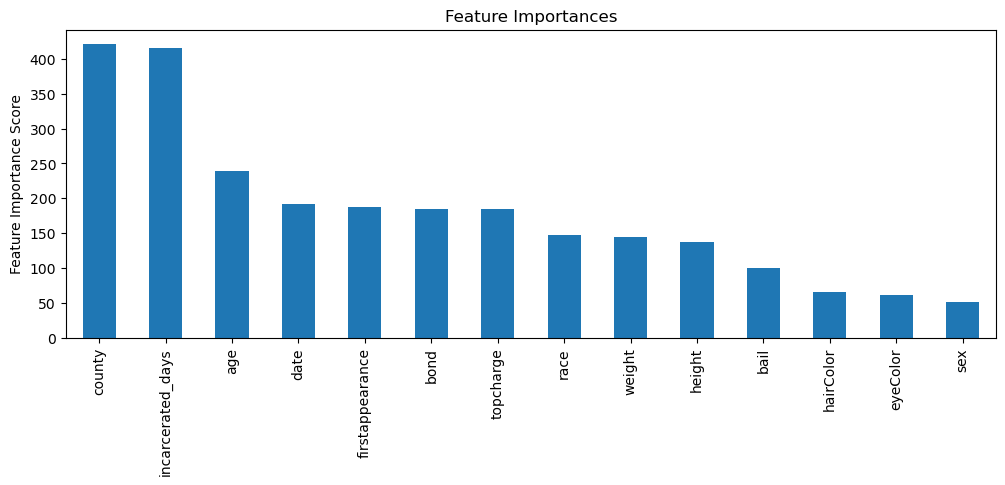

In [9]:
predictors = [x for x in df.columns if x not in not_selected] 
X = df[predictors]
y = df['time_gap'].astype(int)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Create a DMatrix with enable_categorical=True
dtrain = xgb.DMatrix(X_train, label = y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label = y_test, enable_categorical=True)

xgb1 = XGBRegressor(learning_rate =0.2,
                    n_estimators=1000, 
                    max_depth=5,
                    min_child_weight=5,
                    gamma=0.3,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'reg:squarederror',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27,
                    enable_categorical = True)

modelfit(xgb1, dtrain, predictors, dtest = dtest)

## Build a model to predict number of incarcerations

In [12]:
features = ['age', 'sex', 'race',
       'eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
       'topcharge', 'firstappearance', 'county', 'date', 'incarcerated_days' ]

not_selected = ['nameFull', 'bookingNumber', 'bookingDate', 'caseNumber',
                'inmateNumber', 'housing1', 'housing1a', 'housing2', 'housing3',
                'nameLast', 'nameFirst', 'nameMiddle', 'dob', 
                'reincarceration', 'time_gap', 'incarcerated_counts']

# Convert date-related columns to datetime
date_columns = ['firstappearance', 'date']
for col in date_columns:
    df.loc[:,col] = pd.to_datetime(df[col], errors='coerce')

#replace nan value in bond and bail with 0
df.loc[:,'bond'].fillna(0, inplace = True)
df.loc[:,'age'].fillna(df['age'].mean(), inplace = True)
df.loc[:,'bail'].fillna(0, inplace = True)

# Convert 'firstappearance' to the year as an integer
df.loc[:,'firstappearance'] = df['firstappearance'].dt.year
df.loc[:,'firstappearance'] = df['firstappearance'].astype(int)
df.loc[:,'date'] = df['date'].dt.year
df.loc[:,'date'] = df['date'].astype(int)


# Convert 'sex' and 'topcharge' to categorical columns
df['sex'] = df['sex'].astype('category')
df['eyeColor'] = df['eyeColor'].astype('category')
df['hairColor'] = df['hairColor'].astype('category')
df['race'] = df['race'].astype('category')
df['county'] = df['county'].astype('category')
#df = pd.get_dummies(df, columns=['county'], drop_first=True)
df['topcharge'] = df['topcharge'].astype('category')
#df = pd.get_dummies(df, columns=['Top Political'], drop_first=True)

[0]	train-rmse:11.25294+0.12633	test-rmse:11.24451+0.51147
[50]	train-rmse:11.14470+0.12472	test-rmse:11.20908+0.50970
[100]	train-rmse:11.08620+0.12476	test-rmse:11.20785+0.51010
[150]	train-rmse:11.03429+0.12737	test-rmse:11.20923+0.51017
[165]	train-rmse:11.01912+0.12818	test-rmse:11.21052+0.50960

Model Report
Training RMSE: 11.119124412536621
Test RMSE: 11.6896333694458
Feature Importance Scores:
age: 480.0
incarcerated_days: 391.0
county: 378.0
weight: 358.0
height: 340.0
bail: 242.0
race: 240.0
topcharge: 230.0
bond: 168.0
hairColor: 156.0
eyeColor: 102.0
sex: 87.0


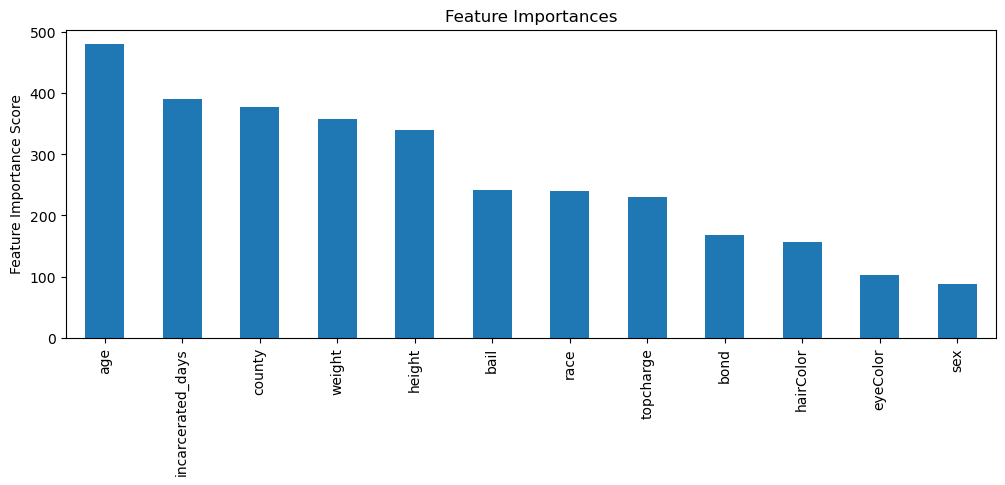

In [13]:
predictors = [x for x in df.columns if x not in not_selected] 
X = df[predictors]
y = df['incarcerated_counts']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a DMatrix with enable_categorical=True
dtrain = xgb.DMatrix(X_train, label = y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label = y_test, enable_categorical=True)

xgb1 = XGBRegressor(learning_rate =0.1,
                    n_estimators=895, 
                    max_depth=5,
                    min_child_weight=5,
                    gamma=0.3,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'reg:squarederror',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27,
                    enable_categorical = True)

modelfit(xgb1, dtrain, predictors, dtest = dtest)

## Build a model to predict if someone could be re-incarcerated or not

In [47]:
# Add a new column reincarcerated base on reincarcerated_counts
df['reincarceration'] = df['reincarcerated_counts'].apply(lambda x: 1 if x > 0 else 0)

In [48]:
features = ['age', 'sex', 'race',
       'eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
       'topcharge', 'firstappearance', 'county', 'date', 'incarcerated_days' ]

not_selected = ['nameFull', 'bookingNumber', 'bookingDate', 'caseNumber',
                'inmateNumber', 'housing1', 'housing1a', 'housing2', 'housing3',
                'nameLast', 'nameFirst', 'nameMiddle', 'dob', 
                'reincarceration', 'time_gap', 'reincarcerated_counts']

# Convert date-related columns to datetime
date_columns = ['firstappearance', 'date']
for col in date_columns:
    df.loc[:,col] = pd.to_datetime(df[col], errors='coerce')

#replace nan value in bond and bail with 0
df.loc[:,'bond'].fillna(0, inplace = True)
df.loc[:,'age'].fillna(df['age'].mean(), inplace = True)
df.loc[:,'bail'].fillna(0, inplace = True)

# Convert 'firstappearance' to the year as an integer
df.loc[:,'firstappearance'] = df['firstappearance'].dt.year
df.loc[:,'firstappearance'] = df['firstappearance'].astype(int)
df.loc[:,'date'] = df['date'].dt.year
df.loc[:,'date'] = df['date'].astype(int)


# Convert 'sex' and 'topcharge' to categorical columns
df['sex'] = df['sex'].astype('category')
df['eyeColor'] = df['eyeColor'].astype('category')
df['hairColor'] = df['hairColor'].astype('category')
df['race'] = df['race'].astype('category')
df['county'] = df['county'].astype('category')
#df = pd.get_dummies(df, columns=['county'], drop_first=True)
df['topcharge'] = df['topcharge'].astype('category')
#df = pd.get_dummies(df, columns=['Top Political'], drop_first=True)

[0]	train-rmse:0.49484+0.00003	test-rmse:0.49486+0.00013
[50]	train-rmse:0.47035+0.00009	test-rmse:0.47136+0.00031
[100]	train-rmse:0.46792+0.00009	test-rmse:0.46973+0.00034
[150]	train-rmse:0.46645+0.00011	test-rmse:0.46896+0.00034
[200]	train-rmse:0.46535+0.00012	test-rmse:0.46851+0.00032
[250]	train-rmse:0.46445+0.00011	test-rmse:0.46828+0.00033
[300]	train-rmse:0.46364+0.00011	test-rmse:0.46809+0.00032
[350]	train-rmse:0.46290+0.00011	test-rmse:0.46797+0.00032
[400]	train-rmse:0.46222+0.00011	test-rmse:0.46785+0.00032
[450]	train-rmse:0.46160+0.00011	test-rmse:0.46779+0.00032
[500]	train-rmse:0.46097+0.00010	test-rmse:0.46772+0.00033
[550]	train-rmse:0.46039+0.00010	test-rmse:0.46766+0.00033
[600]	train-rmse:0.45984+0.00010	test-rmse:0.46763+0.00032
[650]	train-rmse:0.45930+0.00011	test-rmse:0.46760+0.00033
[700]	train-rmse:0.45878+0.00012	test-rmse:0.46759+0.00033
[750]	train-rmse:0.45827+0.00013	test-rmse:0.46758+0.00032
[800]	train-rmse:0.45777+0.00012	test-rmse:0.46758+0.00032


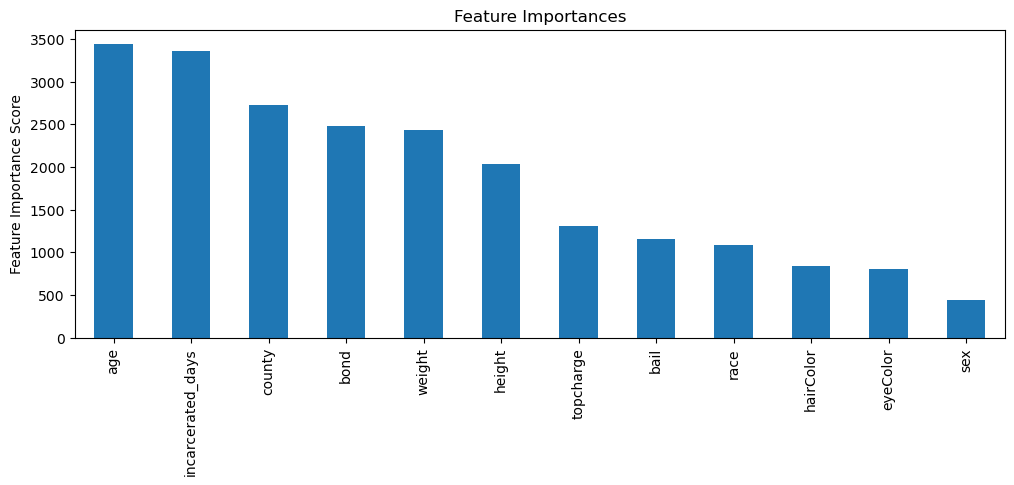

In [49]:
predictors = [x for x in df.columns if x not in not_selected] 
X = df[predictors]
y = df['reincarceration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a DMatrix with enable_categorical=True
dtrain = xgb.DMatrix(X_train, label = y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label = y_test, enable_categorical=True)

xgb1 = XGBRegressor(learning_rate =0.1,
                    n_estimators=895, 
                    max_depth=5,
                    min_child_weight=5,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'reg:squarederror',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27,
                    enable_categorical = True)

modelfit(xgb1, dtrain, predictors, dtest = dtest)

[0]	train-auc:0.65414+0.00035	test-auc:0.65300+0.00076
[50]	train-auc:0.68895+0.00036	test-auc:0.68554+0.00134
[100]	train-auc:0.69604+0.00043	test-auc:0.69057+0.00131
[150]	train-auc:0.70042+0.00038	test-auc:0.69311+0.00124
[200]	train-auc:0.70361+0.00034	test-auc:0.69448+0.00129
[250]	train-auc:0.70618+0.00030	test-auc:0.69529+0.00132
[300]	train-auc:0.70841+0.00025	test-auc:0.69579+0.00128
[350]	train-auc:0.71037+0.00031	test-auc:0.69617+0.00128
[400]	train-auc:0.71223+0.00030	test-auc:0.69652+0.00128
[450]	train-auc:0.71393+0.00035	test-auc:0.69670+0.00124
[500]	train-auc:0.71561+0.00040	test-auc:0.69690+0.00126
[550]	train-auc:0.71718+0.00035	test-auc:0.69707+0.00132
[600]	train-auc:0.71864+0.00039	test-auc:0.69721+0.00128
[650]	train-auc:0.72000+0.00037	test-auc:0.69732+0.00131
[700]	train-auc:0.72138+0.00035	test-auc:0.69743+0.00126
[750]	train-auc:0.72267+0.00036	test-auc:0.69755+0.00124
[800]	train-auc:0.72395+0.00037	test-auc:0.69763+0.00123
[850]	train-auc:0.72519+0.00038	te

/Users/besocxinh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy : 0.646
AUC Score (Train): 0.715714
AUC Score (Test): 0.694986
Feature Importance Scores:
age: 3691.0
incarcerated_days: 3632.0
county: 2939.0
bond: 2747.0
weight: 2574.0
height: 2179.0
topcharge: 1377.0
bail: 1249.0
race: 1219.0
hairColor: 912.0
eyeColor: 821.0
sex: 458.0


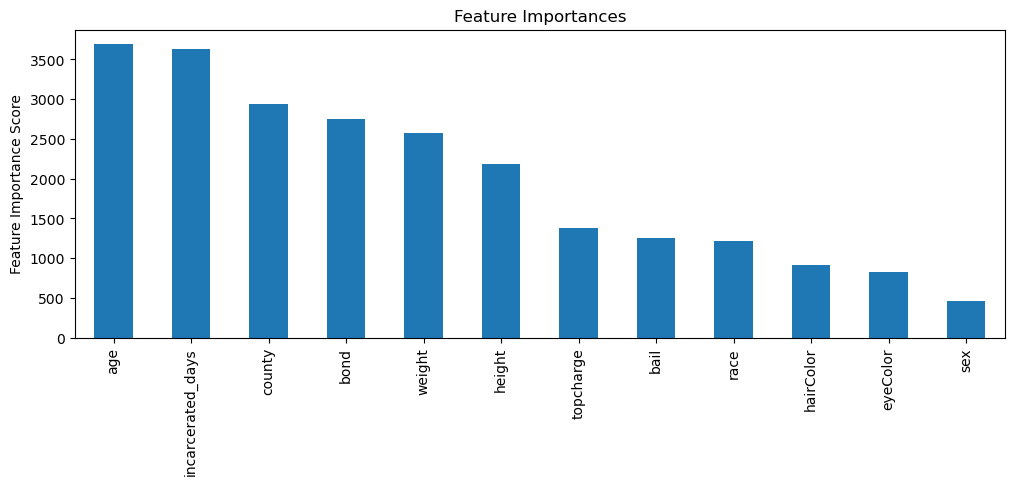

In [52]:
#Choose all predictors except target & IDcols
#predictors = df[features]
rcParams['figure.figsize'] = 12, 4

def modelfit(alg, dtrain, predictors, dtest ,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        #xgtrain = xgb.DMatrix(dtrain[predictors].values, 
                              #label=dtrain['reincarceration'].values, 
                              #enable_categorical = True)
        cvresult = xgb.cv(xgb_param, dtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], 
                          nfold=cv_folds,
                          metrics='auc', 
                          early_stopping_rounds=early_stopping_rounds,
                         verbose_eval = 50)

        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain.get_data(), dtrain.get_label() ,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain.get_data())
    dtrain_predprob = alg.predict_proba(dtrain.get_data())[:,1]
    
    # Predict test set
    dtest_predictions = alg.predict(dtest.get_data())
    dtest_predprob = alg.predict_proba(dtest.get_data())[:, 1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtest.get_label(), dtest_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain.get_label(), dtrain_predprob))
    print ("AUC Score (Test): %f" % metrics.roc_auc_score(dtest.get_label(), dtest_predprob))
                    
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feature_mapping = {f"f{idx}": name for idx, name in enumerate(X)}

    # Print feature importance scores
    print("Feature Importance Scores:")
    for feature, score in feat_imp.items():
        original_feature_name = feature_mapping.get(feature, "Unknown")
        print(f"{original_feature_name if original_feature_name != 'Unknown' else feature}: {score}")

    # Sort feature importances in descending order
    feat_imp = feat_imp.sort_values(ascending=False)

    # Get the feature names based on their index using the feature_mapping dictionary
    feature_names = [feature_mapping.get(feature, f"f{feature}") for feature in feat_imp.index]

    # Plot the feature importances with feature names
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.xticks(range(len(feature_names)), feature_names, rotation=90)  # Set x-axis labels
    plt.ylabel('Feature Importance Score')    
    
    
predictors = [x for x in df.columns if x not in not_selected] 
X = df[predictors]
y = df['reincarceration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a DMatrix with enable_categorical=True
dtrain = xgb.DMatrix(X_train, label = y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label = y_test, enable_categorical=True)

xgb1 = XGBClassifier(learning_rate =0.1,
 n_estimators=895,
 max_depth=5,
 min_child_weight=5,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 enable_categorical = True)

modelfit(xgb1, dtrain, predictors, dtest = dtest)

# Re-incarcerations in different county

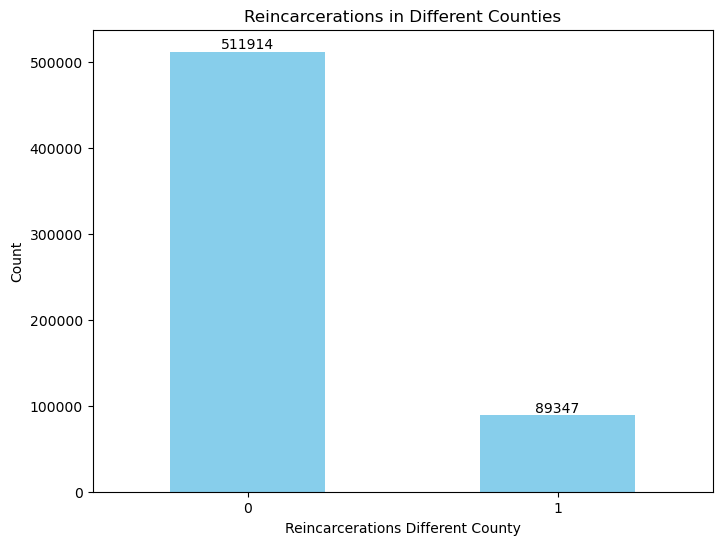

In [7]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the 'reincarcerations_different_county' column as described in the previous answer
# If not, make sure to calculate it before creating the plot

# Group the data by 'reincarcerations_different_county' and count the occurrences
count_data = df['reincarcerations_different_county'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
count_data.plot(kind='bar', color='skyblue')
plt.title('Reincarcerations in Different Counties')
plt.xlabel('Reincarcerations Different County')
plt.ylabel('Count')

# Add labels to the bars
for i, count in enumerate(count_data):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

<Figure size 2000x2000 with 0 Axes>

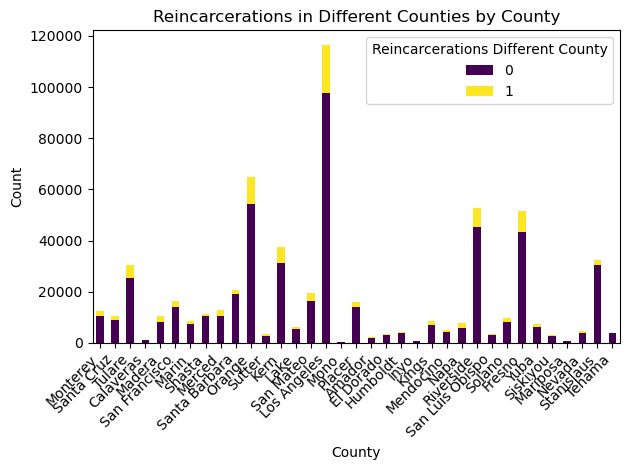

In [8]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the 'reincarcerations_different_county' column as described in the previous answer
# If not, make sure to calculate it before creating the plot

# Group the data by 'county' and calculate the count of each value for 'reincarcerations_different_county'
county_counts = df.groupby('county')['reincarcerations_different_county'].value_counts().unstack(fill_value=0)

# Create a bar chart with multiple bars, one for each county
plt.figure(figsize=(20, 20))
county_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Reincarcerations in Different Counties by County')
plt.xlabel('County')
plt.ylabel('Count')

plt.legend(title='Reincarcerations Different County', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
display(county_counts)

reincarcerations_different_county,0,1
county,,
Monterey,10546,1926
Santa Cruz,9068,1630
Tulare,25523,4774
Calaveras,1030,272
Madera,8051,2478
San Francisco,13888,2538
Marin,7516,1132
Shasta,10531,920
Merced,10652,2053


In [6]:
# Assuming you have a DataFrame called df with the 'reincarcerated_in_different_county' column
# Calculate the total number of individuals reincarcerated in different counties
total_reincarcerated_different_county = df['reincarcerations_different_county'].sum()

# Calculate the total number of unique individuals in the dataset
total_unique_individuals = df['nameFull'].nunique()

# Calculate the rate of reincarceration in different counties
rate_of_reincarceration = total_reincarcerated_different_county / total_unique_individuals

print(f"The rate of reincarceration in different counties is: {rate_of_reincarceration:.2%}")

The rate of reincarceration in different counties is: 23.47%


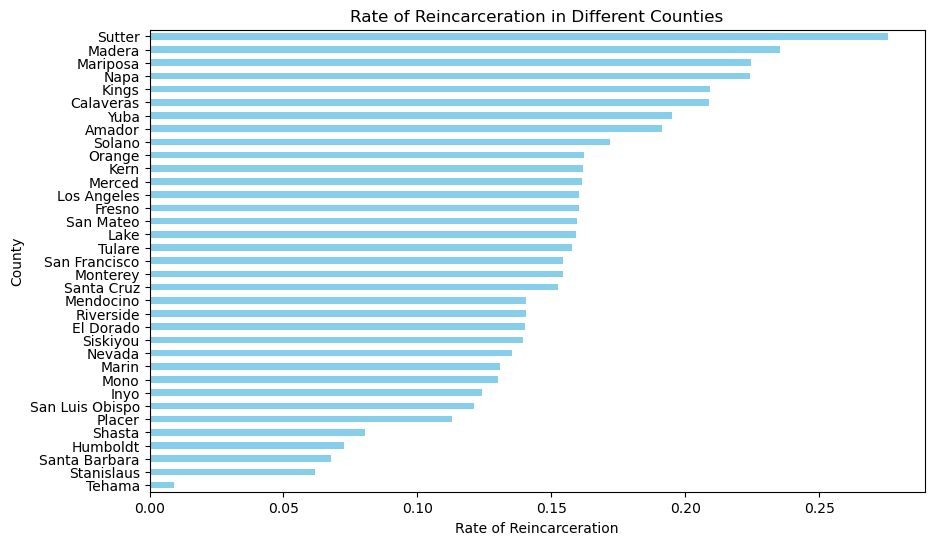

In [10]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called df with the 'reincarcerated_in_different_county' column
# Group the data by county and calculate the mean of 'reincarcerated_in_different_county'
county_reincarceration_rate = df.groupby('county')['reincarcerations_different_county'].mean()

# Plotting the bar chart with counties on the y-axis
plt.figure(figsize=(10, 6))
county_reincarceration_rate.sort_values().plot(kind='barh', color='skyblue')  # Use barh for horizontal bar chart
plt.title('Rate of Reincarceration in Different Counties')
plt.xlabel('Rate of Reincarceration')
plt.ylabel('County')
# Save the figure with a transparent background
plt.savefig('reincarceration_graph.png', transparent=True)
plt.show()

In [24]:
# Calculate the total months of exposure for each record by grouping by 'county'

# Extract 'year' and 'month' from the 'date' column
#df['year'] = df['date'].dt.year
#df['month'] = df['date'].dt.month

# Calculate the total months of exposure for each record by finding the difference
# between the largest and smallest month within the maximum year for that county
df['exposure_duration'] = (df.groupby('county')['year'].transform('max') - df.groupby('county')['year'].transform('min')) * 12 + (df.groupby('county')['month'].transform('max') - df.groupby('county')['month'].transform('min'))

# Add the calculated exposure duration to every record in the same county
df['total_exposure_duration'] = df.groupby('county')['exposure_duration'].transform('max')

# Calculate the rate of re-incarceration per month for each county
df['rate_of_reincarceration'] = df.groupby('county')['reincarcerations_different_county'].transform('sum') / (df.groupby('county')['nameFull'].transform('nunique') * df['total_exposure_duration'])

# Print the rate of re-incarceration for each county
rate_by_county = df.groupby('county')['rate_of_reincarceration'].max()
print("Rate of Re-Incarceration for Each County:")
print(rate_by_county)

Rate of Re-Incarceration for Each County:
county
Monterey           0.004434
Santa Cruz         0.005375
Tulare             0.005546
Calaveras          0.008383
Madera             0.007086
San Francisco      0.006511
Marin              0.003885
Shasta             0.002895
Merced             0.005201
Santa Barbara      0.002037
Orange             0.007517
Sutter             0.010639
Kern               0.006360
Lake               0.005848
San Mateo          0.006909
Los Angeles        0.008987
Mono               0.007228
Placer             0.003326
Amador             0.006136
El Dorado          0.005255
Humboldt           0.004551
Inyo               0.005650
Kings              0.006534
Mendocino          0.009256
Napa               0.007820
Riverside          0.008493
San Luis Obispo    0.013643
Solano             0.010811
Fresno             0.005553
Yuba               0.006556
Siskiyou           0.004570
Mariposa           0.008842
Nevada             0.004548
Stanislaus         0.002248

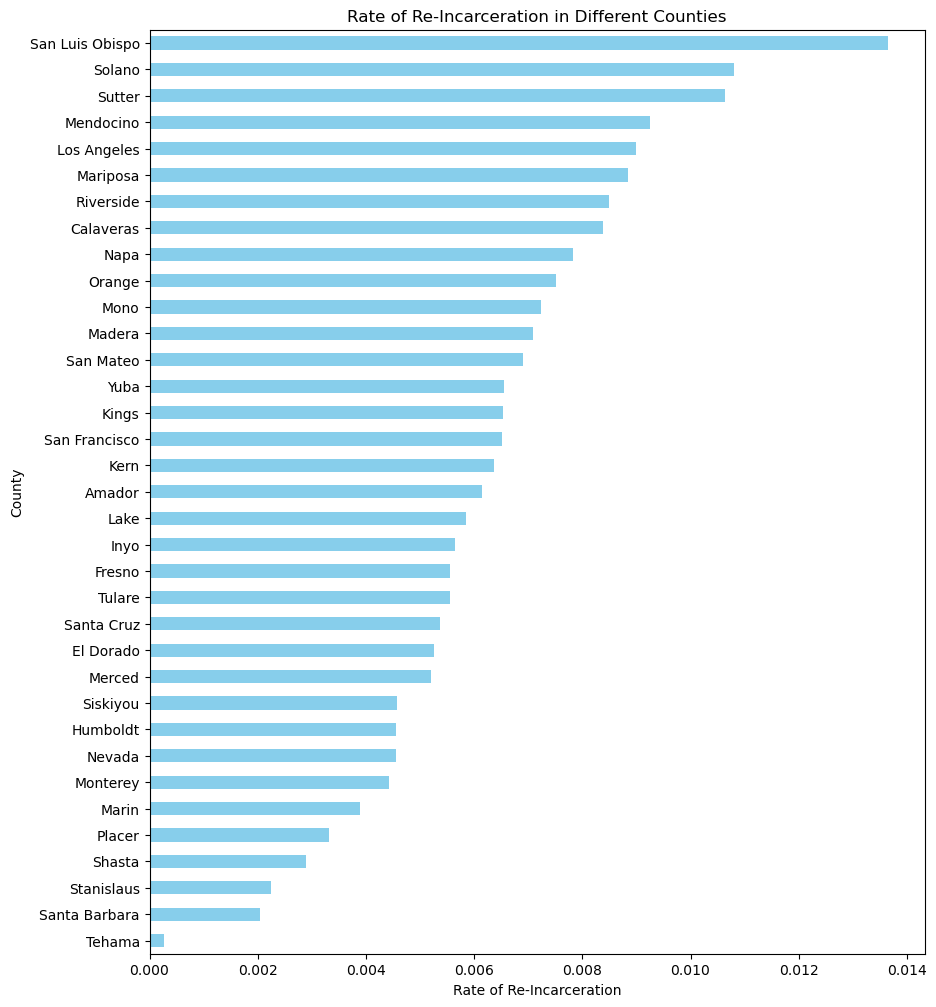

In [26]:
import matplotlib.pyplot as plt

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 12))
rate_by_county.sort_values().plot(kind='barh', color='skyblue')
plt.title('Rate of Re-Incarceration in Different Counties')
plt.xlabel('Rate of Re-Incarceration')
plt.ylabel('County')
plt.savefig('reincarceration_graph_1.png', transparent=True)
plt.show()


# Tendendy or trend analysis for re-incarcerations in different counties

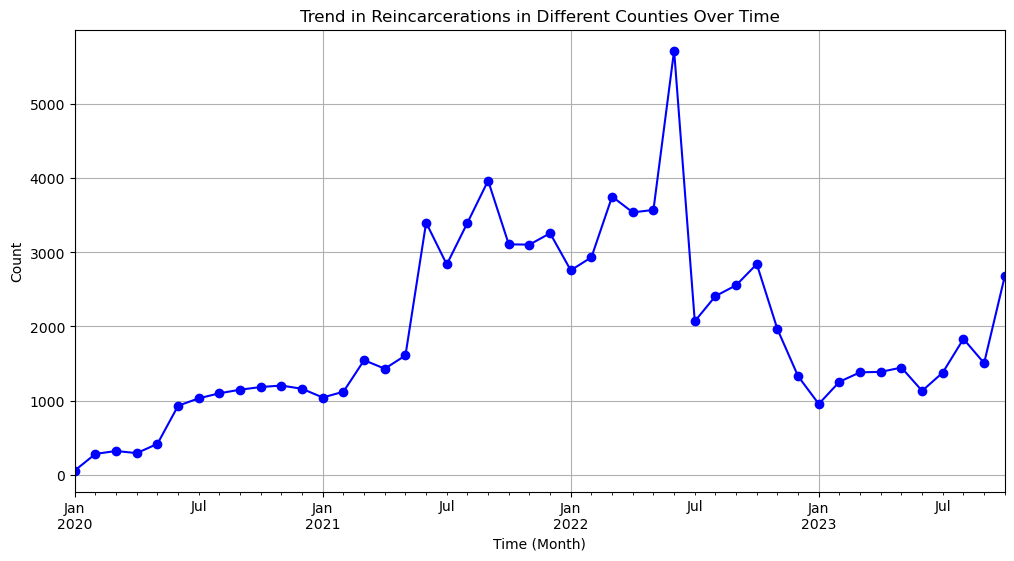

In [27]:
import matplotlib.pyplot as plt

# Group the data by 'bookingDate' and calculate the count of each value for 'reincarcerations_different_county' in each month
trend_data = df.groupby(df['date'].dt.to_period('M'))['reincarcerations_different_county'].sum()

# Create a line chart to visualize the trend
plt.figure(figsize=(12, 6))
trend_data.plot(marker='o', linestyle='-', color='b')
plt.title('Trend in Reincarcerations in Different Counties Over Time')
plt.xlabel('Time (Month)')
plt.ylabel('Count')
plt.grid(True)
plt.savefig('reincarceration_graph_2.png', transparent=True)
plt.show()

In [13]:
# Sort the dataset by 'nameFull' and 'firstappearance'
df = df.sort_values(['nameFull', 'firstappearance'])

# Calculate the difference between 'date' and the next 'firstappearance' for each individual
df['time_gap'] = df.groupby('nameFull')['firstappearance'].shift(-1) - df['date']
# Convert the 'time_gap' column to string
df['time_gap'] = df['time_gap'].astype(str)
df['time_gap'] = df['time_gap'].str.replace(' days', '', regex=False)
# Replace "NaT" with 0 in the 'time_gap' column
df['time_gap'] = df['time_gap'].replace('NaT', 0)

# Convert the 'time_gap' column to integers
df['time_gap'] = df['time_gap'].astype(int)
incarceration_count = {}

for index, row in df.iterrows():
    name = str(row['nameFull']).strip() if not pd.isna(row['nameFull']) else None
    if name:
        if name in incarceration_count:
            incarceration_count[name] += 1
        else:
            incarceration_count[name] = 1

# Create a new column 'incarcerated_counts' based on the counts
df['incarcerated_counts'] = df['nameFull'].apply(lambda x: incarceration_count.get(str(x).strip(), 0) 
                                                 if not pd.isna(x) else 0)

# Add a new column reincarcerated base on reincarcerated_counts
df['reincarceration'] = df['incarcerated_counts'].apply(lambda x: 1 if x > 1 else 0)

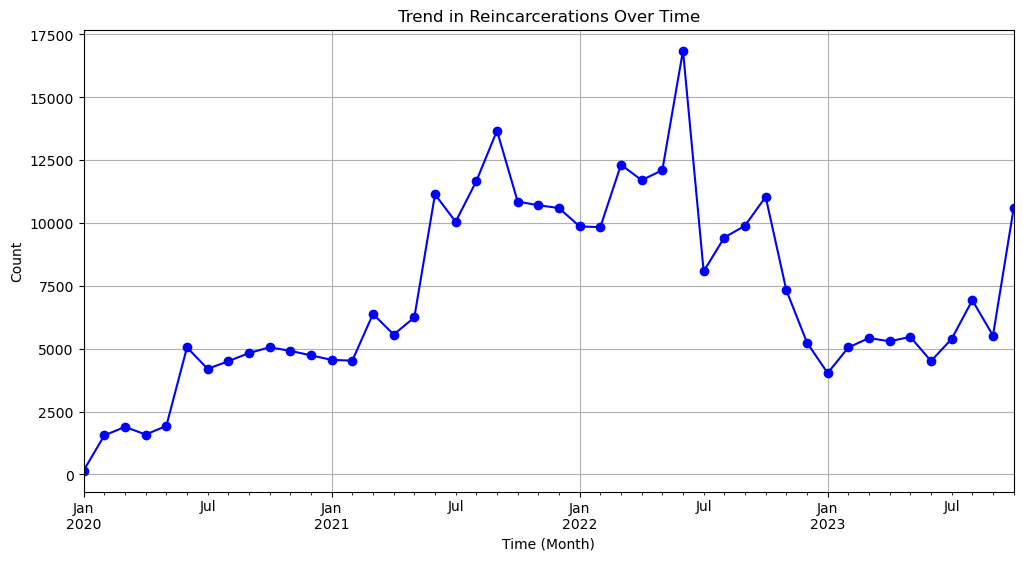

In [16]:
import matplotlib.pyplot as plt

# Group the data by 'bookingDate' and calculate the count of each value for 'reincarcerations_different_county' in each month
trend_data = df.groupby(df['date'].dt.to_period('M'))['reincarceration'].sum()

# Create a line chart to visualize the trend
plt.figure(figsize=(12, 6))
trend_data.plot(marker='o', linestyle='-', color='b')
plt.title('Trend in Reincarcerations Over Time')
plt.xlabel('Time (Month)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder

features = ['age', 'sex', 'race','eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
            'topcharge', 'firstappearance', 'county', 'date' , 'incarcerated_days']

#replace nan value in bond and bail with 0
df.loc[:,'bond'].fillna(0, inplace = True)
df.loc[:,'age'].fillna(df['age'].mean(), inplace = True)
df.loc[:,'bail'].fillna(0, inplace = True)

# Convert 'firstappearance' to the year as an integer
df.loc[:,'firstappearance'] = df['firstappearance'].dt.year
df.loc[:,'firstappearance'] = df['firstappearance'].astype(int)
df.loc[:,'date'] = df['date'].dt.year
df.loc[:,'date'] = df['date'].astype(int)

# Convert 'sex' and 'topcharge' to categorical columns
df['sex'] = df['sex'].astype('int')
df['eyeColor'] = df['eyeColor'].astype('int')
df['hairColor'] = df['hairColor'].astype('int')
df['race'] = df['race'].astype('int')
df['topcharge'] = df['topcharge'].astype('int')

# Create a LabelEncoder instance
label_encoder = LabelEncoder()
# Assuming 'county' is a column in your DataFrame 'df'
df['county'] = label_encoder.fit_transform(df['county'])

# Perform logistic regression
import statsmodels.api as sm

logit_model = sm.Logit(df['reincarcerations_different_county'], df[features])
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.418004
         Iterations 6
                                   Logit Regression Results                                  
Dep. Variable:     reincarcerations_different_county   No. Observations:               601261
Model:                                         Logit   Df Residuals:                   601247
Method:                                          MLE   Df Model:                           13
Date:                               Wed, 08 Nov 2023   Pseudo R-squ.:                0.005396
Time:                                       12:05:49   Log-Likelihood:            -2.5133e+05
converged:                                      True   LL-Null:                   -2.5269e+05
Covariance Type:                           nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------

In [8]:
display(df[features])

,age,sex,race,eyeColor,hairColor,height,weight,bond,bail,topcharge,firstappearance,county,date,incarcerated_days
0,41.0,1,9,9,9,70.0,183.5,0.0,0.0,2,2020-07-08,Monterey,2020-09-17,71
1,49.0,1,9,9,9,70.0,183.5,0.0,0.0,2,2020-10-17,Monterey,2020-11-20,34
2,39.0,1,9,9,9,70.0,183.5,0.0,0.0,2,2020-11-10,Monterey,2020-11-20,10
3,40.0,1,9,9,9,70.0,183.5,0.0,0.0,2,2021-02-23,Monterey,2021-03-18,23
4,46.0,1,9,9,9,70.0,183.5,0.0,0.0,2,2021-09-28,Monterey,2021-11-09,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601256,52.0,9,9,9,9,70.0,183.5,0.0,0.0,1,2020-04-23,Stanislaus,2020-04-30,7
601257,28.0,9,9,9,9,70.0,183.5,0.0,0.0,1,2021-06-24,Stanislaus,2021-06-24,0
601258,28.0,9,9,9,9,70.0,183.5,0.0,0.0,1,2022-02-19,Stanislaus,2022-04-05,45
601259,30.0,9,9,9,9,70.0,183.5,0.0,0.0,1,2021-10-29,Stanislaus,2021-11-03,5


In [5]:
features = ['age', 'sex', 'race',
       'eyeColor', 'hairColor', 'height', 'weight', 'bond', 'bail',
       'topcharge', 'firstappearance', 'county', 'date', 'incarcerated_days', 'reincarcerated_counts' ]

not_selected = ['nameFull', 'bookingNumber', 'bookingDate', 'caseNumber',
                'inmateNumber', 'housing1', 'housing1a', 'housing2', 'housing3',
                'nameLast', 'nameFirst', 'nameMiddle', 'dob', 
                'time_gap', 'reincarceration', 'reincarcerations_different_county', 'incarcerated_counts']

# Convert date-related columns to datetime
#date_columns = ['firstappearance']
#for col in date_columns:
    #df.loc[:,col] = pd.to_datetime(df[col], errors='coerce')

#replace nan value in bond and bail with 0
df.loc[:,'bond'].fillna(0, inplace = True)
df.loc[:,'age'].fillna(df['age'].mean(), inplace = True)
df.loc[:,'bail'].fillna(0, inplace = True)

# Convert 'firstappearance' to the year as an integer
df.loc[:,'firstappearance'] = df['firstappearance'].dt.year
df.loc[:,'firstappearance'] = df['firstappearance'].astype(int)
df.loc[:,'date'] = df['date'].dt.year
df.loc[:,'date'] = df['date'].astype(int)


# Convert 'sex' and 'topcharge' to categorical columns
df['sex'] = df['sex'].astype('category')
df['eyeColor'] = df['eyeColor'].astype('category')
df['hairColor'] = df['hairColor'].astype('category')
df['race'] = df['race'].astype('category')
df['county'] = df['county'].astype('category')
#df = pd.get_dummies(df, columns=['county'], drop_first=True)
df['topcharge'] = df['topcharge'].astype('category')
#df = pd.get_dummies(df, columns=['Top Political'], drop_first=True)

In [8]:
def modelfit(alg, dtrain, predictors, dtest ,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        #xgtrain = xgb.DMatrix(dtrain[predictors].values, 
                              #label=dtrain['reincarceration'].values, 
                              #enable_categorical = True)
        cvresult = xgb.cv(xgb_param, dtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], 
                          nfold=cv_folds,
                          metrics='rmse', 
                          early_stopping_rounds=early_stopping_rounds,
                         verbose_eval = 50)

        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain.get_data(), dtrain.get_label())
    
    dtrain_predictions = alg.predict(dtrain.get_data())
    dtest_predictions = alg.predict(dtest.get_data())

    # Calculate RMSE for training and test sets
    train_rmse = np.sqrt(mean_squared_error(dtrain.get_label(), dtrain_predictions))
    test_rmse = np.sqrt(mean_squared_error(dtest.get_label(), dtest_predictions))
        
    # Print model report with RMSE
    print("\nModel Report")
    print(f"Training RMSE: {train_rmse}")
    print(f"Test RMSE: {test_rmse}")
                    
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feature_mapping = {f"f{idx}": name for idx, name in enumerate(X)}

    # Print feature importance scores
    print("Feature Importance Scores:")
    for feature, score in feat_imp.items():
        original_feature_name = feature_mapping.get(feature, "Unknown")
        print(f"{original_feature_name if original_feature_name != 'Unknown' else feature}: {score}")
        
    # Sort feature importances in descending order
    feat_imp = feat_imp.sort_values(ascending=False)

    # Get the feature names based on their index using the feature_mapping dictionary
    feature_names = [feature_mapping.get(feature, f"f{feature}") for feature in feat_imp.index]

    # Plot the feature importances with feature names
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.xticks(range(len(feature_names)), feature_names, rotation=90)  # Set x-axis labels
    plt.ylabel('Feature Importance Score')

[0]	train-auc:0.60198+0.00030	test-auc:0.60078+0.00148
[50]	train-auc:0.65968+0.00052	test-auc:0.65311+0.00171
[100]	train-auc:0.66823+0.00058	test-auc:0.65646+0.00148
[150]	train-auc:0.67442+0.00055	test-auc:0.65798+0.00151
[200]	train-auc:0.67991+0.00054	test-auc:0.65920+0.00152
[250]	train-auc:0.68450+0.00050	test-auc:0.65988+0.00145
[300]	train-auc:0.68877+0.00048	test-auc:0.66064+0.00155
[350]	train-auc:0.69265+0.00055	test-auc:0.66096+0.00152
[400]	train-auc:0.69612+0.00063	test-auc:0.66137+0.00151
[450]	train-auc:0.69944+0.00053	test-auc:0.66158+0.00162
[500]	train-auc:0.70264+0.00048	test-auc:0.66180+0.00156
[550]	train-auc:0.70556+0.00041	test-auc:0.66202+0.00157
[600]	train-auc:0.70841+0.00036	test-auc:0.66211+0.00151
[650]	train-auc:0.71093+0.00042	test-auc:0.66220+0.00149
[691]	train-auc:0.71306+0.00041	test-auc:0.66223+0.00155


/Users/besocxinh/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



Model Report
Accuracy : 0.8516
AUC Score (Train): 0.694550
AUC Score (Test): 0.660071
Feature Importance Scores:
age: 2795.0
incarcerated_days: 2157.0
weight: 1950.0
county: 1852.0
bond: 1607.0
height: 1525.0
race: 948.0
bail: 783.0
topcharge: 773.0
hairColor: 597.0
eyeColor: 521.0
firstappearance: 409.0
date: 325.0
sex: 324.0


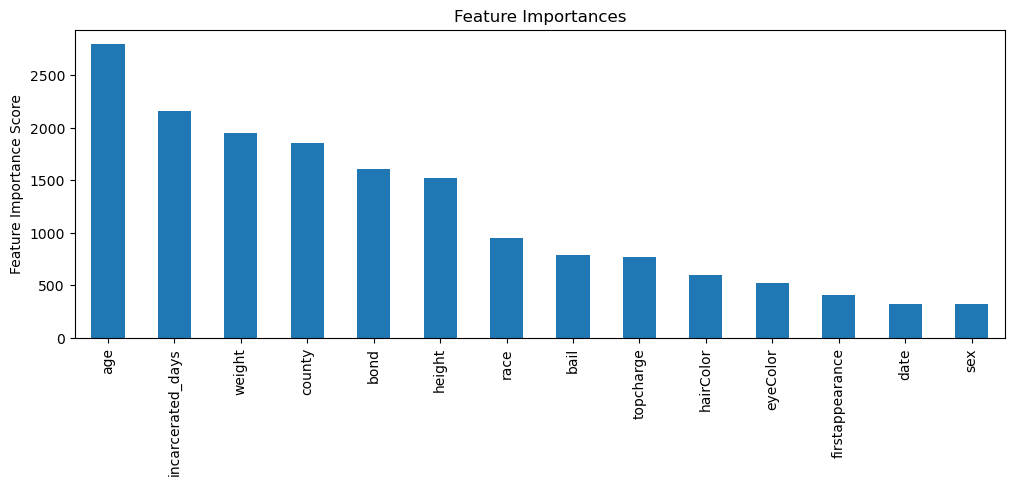

In [6]:
#Choose all predictors except target & IDcols
#predictors = df[features]
rcParams['figure.figsize'] = 12, 4

def modelfit(alg, dtrain, predictors, dtest ,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        #xgtrain = xgb.DMatrix(dtrain[predictors].values, 
                              #label=dtrain['reincarceration'].values, 
                              #enable_categorical = True)
        cvresult = xgb.cv(xgb_param, dtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], 
                          nfold=cv_folds,
                          metrics='auc', 
                          early_stopping_rounds=early_stopping_rounds,
                         verbose_eval = 50)

        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain.get_data(), dtrain.get_label() ,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain.get_data())
    dtrain_predprob = alg.predict_proba(dtrain.get_data())[:,1]
    
    # Predict test set
    dtest_predictions = alg.predict(dtest.get_data())
    dtest_predprob = alg.predict_proba(dtest.get_data())[:, 1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtest.get_label(), dtest_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain.get_label(), dtrain_predprob))
    print ("AUC Score (Test): %f" % metrics.roc_auc_score(dtest.get_label(), dtest_predprob))
                    
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feature_mapping = {f"f{idx}": name for idx, name in enumerate(X)}

    # Print feature importance scores
    print("Feature Importance Scores:")
    for feature, score in feat_imp.items():
        original_feature_name = feature_mapping.get(feature, "Unknown")
        print(f"{original_feature_name if original_feature_name != 'Unknown' else feature}: {score}")

    # Sort feature importances in descending order
    feat_imp = feat_imp.sort_values(ascending=False)

    # Get the feature names based on their index using the feature_mapping dictionary
    feature_names = [feature_mapping.get(feature, f"f{feature}") for feature in feat_imp.index]

    # Plot the feature importances with feature names
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.xticks(range(len(feature_names)), feature_names, rotation=90)  # Set x-axis labels
    plt.ylabel('Feature Importance Score')
    plt.savefig('reincarceration_graph_2.png', transparent=True)
    
    
predictors = [x for x in df.columns if x not in not_selected] 
X = df[predictors]
y = df['reincarcerations_different_county']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a DMatrix with enable_categorical=True
dtrain = xgb.DMatrix(X_train, label = y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label = y_test, enable_categorical=True)

xgb1 = XGBClassifier(learning_rate =0.1,
 n_estimators=895,
 max_depth=5,
 min_child_weight=5,
 gamma=0.3,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 enable_categorical = True)

modelfit(xgb1, dtrain, predictors, dtest = dtest)